In [1]:
import sys
sys.path.append('../')  # add parent directory to the system path
from utils_data import *
from utils_model import *

In [ ]:
pre_fix = "train" # test, train
what_data = "groundtruth" #  images groundtruth

file_name = f"{pre_fix}-{what_data}.tif"
image = Image.open(os.path.join(f"../input/data/{pre_fix}/", file_name))
print(image.n_frames)

In [ ]:
image.seek(0)
image_array = np.array(image)
unique_classes = np.unique(image_array)
print(unique_classes)

In [ ]:
figure = visualize_frames(image, title = f"Visualization of the {pre_fix} {what_data} data", number_frames=9, layout=(3,3), figsize=(12,10))

file_path = "../input/viz"
file_name = f"{pre_fix}_{what_data}_visualization.png"
output_path = "../output/viz/"
save_plot(figure, file_name, file_path)

In [2]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog

path_to_train_JSON = os.path.join("../input/data/train/train_images/train.json")
path_to_train_images = os.path.join("../input/data/train/train_images/")
register_coco_instances("train", {}, path_to_train_JSON, path_to_train_images)

train_metadata = MetadataCatalog.get("train")
train_dataset_dicts = DatasetCatalog.get("train")

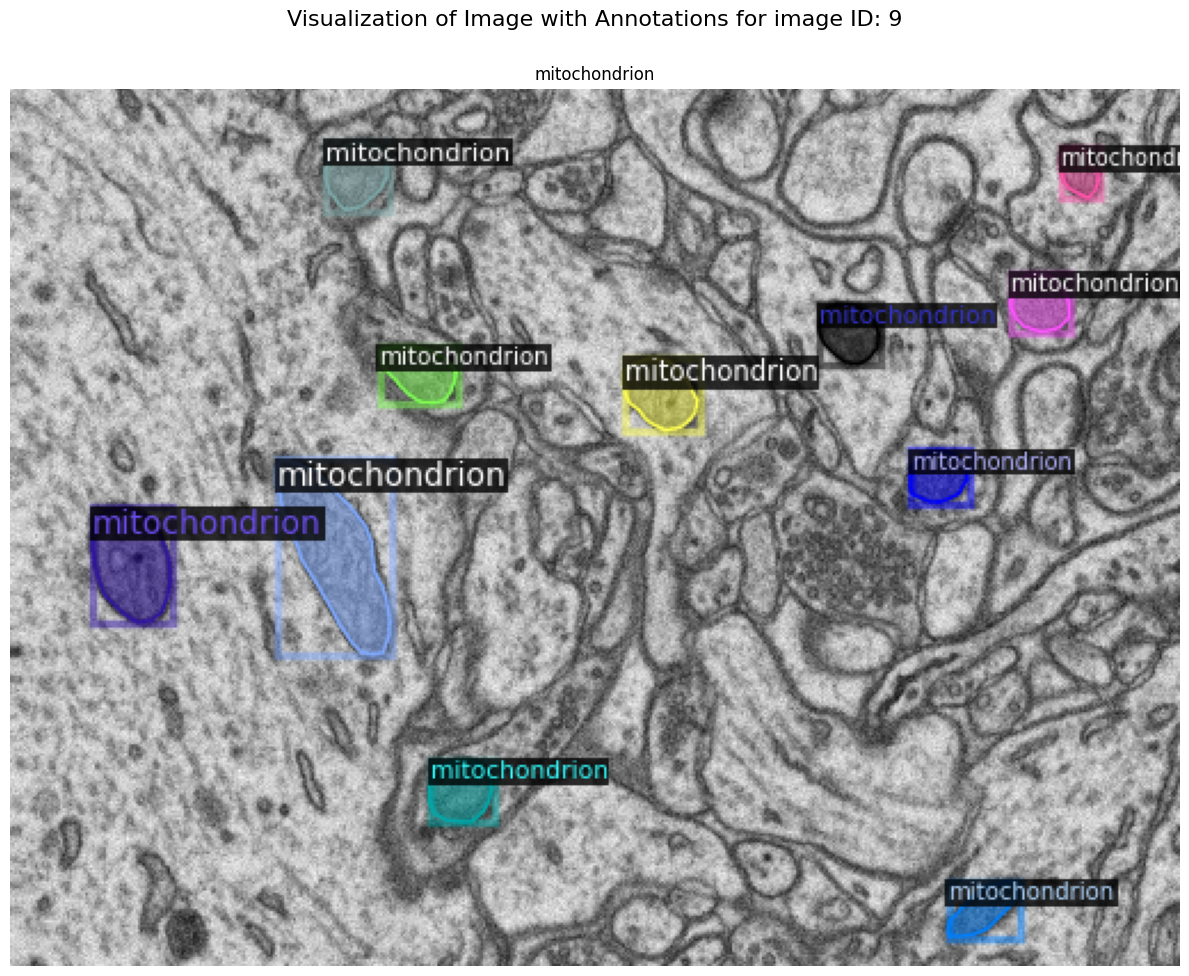

In [13]:
# ________________ VISUALIZE THE ANNOTATED TRAIN DATA ________________ #
annotated_train_visualization = visualize_image_with_annotation(train_dataset_dicts, train_metadata, image_id=9, n_cols=1, figsize=(12, 10))

# save_plot(annotated_train_visualization, "image_with_annotation.png", "../input/viz/")

In [12]:
train_annotation = load_JSON("../input/data/train/train_images/", "train.json")

In [20]:
import pandas as pd

# Extract areas, category IDs, and image IDs from annotations
areas = [anno["area"] for anno in train_annotation["annotations"]]
category_ids = [anno["category_id"] for anno in train_annotation["annotations"]]
image_ids = [anno["image_id"] for anno in train_annotation["annotations"]]

# Create a DataFrame from the extracted data
df = pd.DataFrame({"Area": areas, "Category ID": category_ids, "image_id": image_ids})

# Extract category names and their corresponding IDs
category_names = {category["id"]: category["name"] for category in train_annotation["categories"]}

# Map category IDs to their names in the DataFrame and replace underscores
df["Category Name"] = df["Category ID"].map(category_names).str.replace("_", " ")

In [ ]:

# # Plotting area for each category with red mean markers, consistent color coding, and no grid
# plt.figure(figsize=(8, 6))
# sns.boxplot(y="Category Name", x="Area", data=df, order=category_order, showmeans=True,
#             meanprops={"marker":"o",
#                        "markerfacecolor":"red", 
#                        "markeredgecolor":"red",
#                        "markersize":"8"},
#             orient="h", palette=palette)
# plt.legend(handles=legend_labels)
# plt.grid(False)
# plt.title("Box plot of Area for each Category")
# plt.ylabel("")
# plt.xlabel("Area (squared pixel)")
# plt.tight_layout()
# # plt.savefig("../input/viz/plot_of_area for_category_1.png")
# plt.show()